In [ ]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/TA_RAHADIAN_MUHAMMAD_SUTANDAR/Twitter_text_Scrapping_WisataHalal.csv", sep= ';')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8104 entries, 0 to 8103
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   created_at           8104 non-null   object
 1   id_str               8104 non-null   object
 2   full_text            8104 non-null   object
 3   quote_count          8104 non-null   int64 
 4   reply_count          8104 non-null   int64 
 5   retweet_count        8104 non-null   int64 
 6   favorite_count       8104 non-null   int64 
 7   lang                 8104 non-null   object
 8   user_id_str          8104 non-null   object
 9   conversation_id_str  8104 non-null   object
 10  username             8104 non-null   object
 11  tweet_url            8104 non-null   object
dtypes: int64(4), object(8)
memory usage: 759.9+ KB


In [ ]:
from datetime import datetime
# Pisahkan tanggal dan waktu untuk setiap baris dalam DataFrame
for index, row in data.iterrows():
    try:
        date_time_obj = datetime.strptime(row['created_at'], '%a %b %d %H:%M:%S %z %Y')
        data.at[index, 'tanggal'] = date_time_obj.strftime('%a %b %d')
        data.at[index, 'waktu'] = date_time_obj.strftime('%H:%M:%S')
    except ValueError:
        print(f"Error: Gagal memisahkan tanggal dan waktu pada: {row['created_at']}")

# Menampilkan DataFrame dengan kolom tanggal dan waktu terpisah
data.head(5)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,tanggal,waktu
0,Thu Feb 08 15:46:52 +0000 2024,"1,76E+18",@gajahgemblik @Ajiek_Dewa78 @daunsirih5 @GlHin...,0,0,0,1,in,"1,61E+18","1,76E+18",Matahari_tmr,https://twitter.com/Matahari_tmr/status/175561...,Thu Feb 08,15:46:52
1,Thu Feb 08 06:04:58 +0000 2024,"1,76E+18",@lurino UMKM dan PKL kini sudah terdaftar dan ...,0,0,0,0,in,57801394,"1,76E+18",Sesa_Opas,https://twitter.com/Sesa_Opas/status/175547277...,Thu Feb 08,06:04:58
2,Tue Feb 06 13:59:23 +0000 2024,"1,75E+18",AMIN dan PKS adalah pilihan cerdas untuk mempe...,0,0,0,0,in,150526406,"1,75E+18",WahyuID,https://twitter.com/WahyuID/status/17546510023...,Tue Feb 06,13:59:23
3,Mon Feb 05 14:57:06 +0000 2024,"1,75E+18",pen banget ke itali tapi masih kurang ramah bu...,0,0,0,1,in,"1,31E+18","1,75E+18",chamattchu,https://twitter.com/chamattchu/status/17545195...,Mon Feb 05,14:57:06
4,Mon Feb 05 12:37:02 +0000 2024,"1,75E+18",AMIN dan PKS adalah pilihan cerdas untuk mempe...,0,0,0,0,in,"1,21E+18","1,75E+18",IndahWawawa,https://twitter.com/IndahWawawa/status/1754484...,Mon Feb 05,12:37:02


In [ ]:
# Membuat DataFrame baru dengan kolom yang dipilih
df = pd.DataFrame(data[['tanggal', 'waktu', 'username', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'full_text']])

# Menampilkan 5 baris pertama dari DataFrame
df.head(5)


,tanggal,waktu,username,quote_count,reply_count,retweet_count,favorite_count,full_text
0,Thu Feb 08,15:46:52,Matahari_tmr,0,0,0,1,@gajahgemblik @Ajiek_Dewa78 @daunsirih5 @GlHin...
1,Thu Feb 08,06:04:58,Sesa_Opas,0,0,0,0,@lurino UMKM dan PKL kini sudah terdaftar dan ...
2,Tue Feb 06,13:59:23,WahyuID,0,0,0,0,AMIN dan PKS adalah pilihan cerdas untuk mempe...
3,Mon Feb 05,14:57:06,chamattchu,0,0,0,1,pen banget ke itali tapi masih kurang ramah bu...
4,Mon Feb 05,12:37:02,IndahWawawa,0,0,0,0,AMIN dan PKS adalah pilihan cerdas untuk mempe...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8104 entries, 0 to 8103
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tanggal         8104 non-null   object
 1   waktu           8104 non-null   object
 2   username        8104 non-null   object
 3   quote_count     8104 non-null   int64 
 4   reply_count     8104 non-null   int64 
 5   retweet_count   8104 non-null   int64 
 6   favorite_count  8104 non-null   int64 
 7   full_text       8104 non-null   object
dtypes: int64(4), object(4)
memory usage: 506.6+ KB


In [ ]:
# Menghapus baris duplikat berdasarkan nilai kolom 'full_text'
df.drop_duplicates(subset='full_text', keep='first', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6578 entries, 0 to 8103
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tanggal         6578 non-null   object
 1   waktu           6578 non-null   object
 2   username        6578 non-null   object
 3   quote_count     6578 non-null   int64 
 4   reply_count     6578 non-null   int64 
 5   retweet_count   6578 non-null   int64 
 6   favorite_count  6578 non-null   int64 
 7   full_text       6578 non-null   object
dtypes: int64(4), object(4)
memory usage: 462.5+ KB


In [ ]:
import pandas as pd
import re

# Fungsi untuk menghapus URL
def remove_URL(tweet):
    if tweet is not None and isinstance(tweet, str):
        url = re.compile(r'https?://\S+')
        return url.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus HTML
def remove_html(tweet):
    if tweet is not None and isinstance(tweet, str):
        html = re.compile(r'<.*?>')
        return html.sub(r"", tweet)
    else:
        return tweet

# Fungsi untuk menghapus emoji
def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F700-\U0001F77F"  # alchemical symbols
            u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
            u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
            u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
            u"\U0001FA00-\U0001FA6F"  # Chess Symbols
            u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
            u"\U0001F004-\U0001F0CF"  # Additional emoticons
            u"\U0001F1E0-\U0001F1FF"  # flags
                               "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', tweet)
    return tweet

# Fungsi untuk menghapus angka
def remove_numbers(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'\d', '', tweet) # Menghapus semua angka
    return tweet

# Fungsi untuk menghapus username
def remove_username(text):
    return re.sub(r'@[^\s]+', '', text)

# Fungsi untuk mengganti kata-kata slang dengan ekivalen formalnya
def replace_slang(text):
    lexicon_df = pd.read_csv('/content/colloquial-indonesian-lexicon.csv')
    lexicon_dict = dict(zip(lexicon_df.slang, lexicon_df.formal))
    return ' '.join([lexicon_dict.get(word, word) for word in text.split()])

# Fungsi untuk menghapus stop words
def remove_stopwords(text):
    with open('/content/id.stopwords.02.01.2016.txt', 'r') as f:
        stop_words = set(f.read().splitlines())
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])

# Mengaplikasikan fungsi-fungsi pembersihan ke dalam kolom 'cleaning' dalam DataFrame
df['cleaning'] = df['full_text'].apply(remove_URL)
df['cleaning'] = df['cleaning'].apply(remove_username)
df['cleaning'] = df['cleaning'].apply(remove_html)
#df['cleaning'] = df['cleaning'].apply(remove_emoji)
df['cleaning'] = df['cleaning'].apply(remove_numbers)
df['cleaning'] = df['cleaning'].apply(replace_slang)
df['cleaning'] = df['cleaning'].apply(remove_stopwords)

df.head(5)


,tanggal,waktu,username,quote_count,reply_count,retweet_count,favorite_count,full_text,cleaning,case_folding
0,Thu Feb 08,15:46:52,Matahari_tmr,0,0,0,1,@gajahgemblik @Ajiek_Dewa78 @daunsirih5 @GlHin...,"Sy pikir Bali dianak tirikan, penyumbang devis...","Sy pikir Bali dianak tirikan, padaha..."
1,Thu Feb 08,06:04:58,Sesa_Opas,0,0,0,0,@lurino UMKM dan PKL kini sudah terdaftar dan ...,UMKM PKL terdaftar resmi wajib pajak(?) kayakn...,UMKM dan PKL kini sudah terdaftar dan resmi m...
3,Mon Feb 05,14:57:06,chamattchu,0,0,0,1,pen banget ke itali tapi masih kurang ramah bu...,pengin banget itali ramah pariwisata halal wkw...,pen banget ke itali tapi masih kurang ramah bu...
5,Sun Feb 04,18:24:37,ayamgorenggggg_,0,0,0,0,"@JTXTEEZ @modosken @barubikinlol Kak, jangan n...","Kak, ngegas sarkas 😔. Gua mikir budaya barat d...","Kak, jangan ngegas saya juga lagi sarkas 😔...."
6,Thu Feb 01,03:27:38,moscow_hahaha,0,0,0,0,@tubirfess Tapi indog seperti ini @barubikinlo...,indog mengenjot pariwisata halal diindonesia s...,Tapi indog seperti ini kan ingin mengenjot p...


In [ ]:
def case_folding(text):
    if isinstance(text, str):
        lowercase_text = text.lower()
        return lowercase_text
    else:
        return text

df['case_folding'] = df['cleaning'].apply(case_folding)
df.head(5)

,tanggal,waktu,username,quote_count,reply_count,retweet_count,favorite_count,full_text,cleaning,case_folding
0,Thu Feb 08,15:46:52,Matahari_tmr,0,0,0,1,@gajahgemblik @Ajiek_Dewa78 @daunsirih5 @GlHin...,"Sy pikir Bali dianak tirikan, penyumbang devis...","sy pikir bali dianak tirikan, penyumbang devis..."
1,Thu Feb 08,06:04:58,Sesa_Opas,0,0,0,0,@lurino UMKM dan PKL kini sudah terdaftar dan ...,UMKM PKL terdaftar resmi wajib pajak(?) kayakn...,umkm pkl terdaftar resmi wajib pajak(?) kayakn...
3,Mon Feb 05,14:57:06,chamattchu,0,0,0,1,pen banget ke itali tapi masih kurang ramah bu...,pengin banget itali ramah pariwisata halal wkw...,pengin banget itali ramah pariwisata halal wkw...
5,Sun Feb 04,18:24:37,ayamgorenggggg_,0,0,0,0,"@JTXTEEZ @modosken @barubikinlol Kak, jangan n...","Kak, ngegas sarkas 😔. Gua mikir budaya barat d...","kak, ngegas sarkas 😔. gua mikir budaya barat d..."
6,Thu Feb 01,03:27:38,moscow_hahaha,0,0,0,0,@tubirfess Tapi indog seperti ini @barubikinlo...,indog mengenjot pariwisata halal diindonesia s...,indog mengenjot pariwisata halal diindonesia s...


In [ ]:
# List kata-kata yang tidak relevan
unwanted_words = ['anis','pks', 'imin', 'Amin','fpi','bolehkokpindah02', '#puanmaharani','gerindra'' anies deserve better', 'prabowo', 'ganjar', 'puan','gibran','pkb']

# Membuat filter untuk baris yang mengandung kata-kata tidak relevan
filter_mask = df['case_folding'].apply(lambda tokens: not any(word in tokens for word in unwanted_words))

# Mengaplikasikan filter untuk mendrop baris yang tidak relevan
df = df[filter_mask]

# Menampilkan hasil setelah menjatuhkan baris yang tidak relevan
df.head(5)

,tanggal,waktu,username,quote_count,reply_count,retweet_count,favorite_count,full_text,cleaning,case_folding
0,Thu Feb 08,15:46:52,Matahari_tmr,0,0,0,1,@gajahgemblik @Ajiek_Dewa78 @daunsirih5 @GlHin...,"Sy pikir Bali dianak tirikan, penyumbang devis...","sy pikir bali dianak tirikan, penyumbang devis..."
1,Thu Feb 08,06:04:58,Sesa_Opas,0,0,0,0,@lurino UMKM dan PKL kini sudah terdaftar dan ...,UMKM PKL terdaftar resmi wajib pajak(?) kayakn...,umkm pkl terdaftar resmi wajib pajak(?) kayakn...
3,Mon Feb 05,14:57:06,chamattchu,0,0,0,1,pen banget ke itali tapi masih kurang ramah bu...,pengin banget itali ramah pariwisata halal wkw...,pengin banget itali ramah pariwisata halal wkw...
5,Sun Feb 04,18:24:37,ayamgorenggggg_,0,0,0,0,"@JTXTEEZ @modosken @barubikinlol Kak, jangan n...","Kak, ngegas sarkas 😔. Gua mikir budaya barat d...","kak, ngegas sarkas 😔. gua mikir budaya barat d..."
6,Thu Feb 01,03:27:38,moscow_hahaha,0,0,0,0,@tubirfess Tapi indog seperti ini @barubikinlo...,indog mengenjot pariwisata halal diindonesia s...,indog mengenjot pariwisata halal diindonesia s...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5752 entries, 0 to 8103
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tanggal         5752 non-null   object
 1   waktu           5752 non-null   object
 2   username        5752 non-null   object
 3   quote_count     5752 non-null   int64 
 4   reply_count     5752 non-null   int64 
 5   retweet_count   5752 non-null   int64 
 6   favorite_count  5752 non-null   int64 
 7   full_text       5752 non-null   object
 8   cleaning        5752 non-null   object
 9   case_folding    5752 non-null   object
dtypes: int64(4), object(6)
memory usage: 623.4+ KB


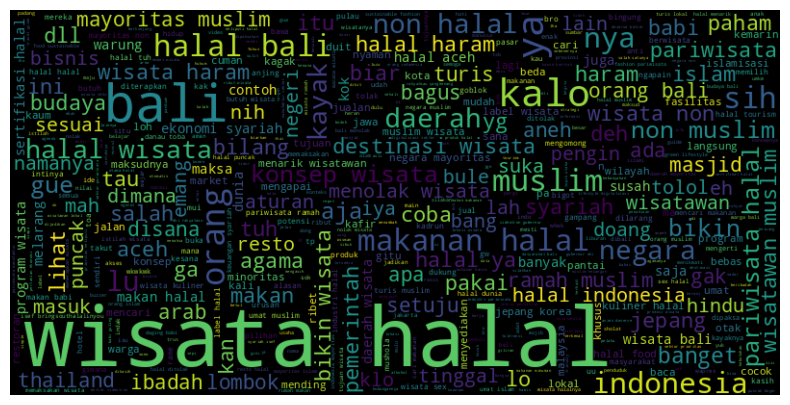

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Mengisi nilai NaN dengan string kosong ('')
df['case_folding'] = df['case_folding'].fillna('')

# Menggabungkan teks dari kolom 'full_text'
text = ' '.join(df['case_folding'].astype(str).tolist())

# Set stopwords
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=800, height=400)

# Generate WordCloud
wc.generate(text)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Menyimpan DataFrame ke dalam file Excel dengan nama 'output.xlsx'
df.to_excel('text_processing_halal_TESTING.xlsx', index=False)

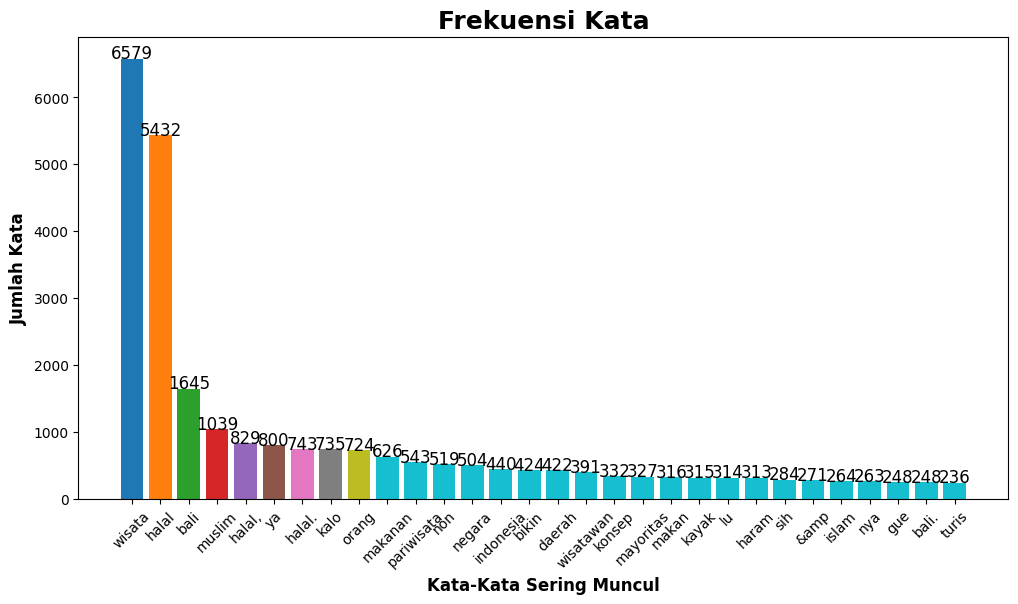

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

text = " ".join(df["case_folding"])
tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(30)

words, counts = zip(*top_words)

# Definisikan palet warna
colors = plt.cm.tab10(range(len(words)))

plt.figure(figsize=(12, 6))
bars = plt.bar(words, counts, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Menambahkan angka rata tengah di atas setiap bar
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, count + 1, str(count), fontsize=12, color="black", ha="center")

plt.show()


In [ ]:
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained("indolem/indobertweet-base-uncased")
model = AutoModel.from_pretrained("indolem/indobertweet-base-uncased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.10k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/235k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/445M [00:00<?, ?B/s]

Case_Folding

In [ ]:
def tokenize(text):
    tokens = text.split()
    return tokens

df['tokenize'] = df['normalisasi'].apply(tokenize)

df.head(5)

,tanggal,waktu,username,quote_count,reply_count,retweet_count,favorite_count,full_text,cleaning,case_folding,normalisasi,tokenize
0,Thu Feb 08,15:46:52,Matahari_tmr,0,0,0,1,@gajahgemblik @Ajiek_Dewa78 @daunsirih5 @GlHin...,"Sy pikir Bali dianak tirikan, padaha...","sy pikir bali dianak tirikan, padaha...","saya pikir bali dianak tirikan, padahal penyum...","[saya, pikir, bali, dianak, tirikan,, padahal,..."
1,Thu Feb 08,06:04:58,Sesa_Opas,0,0,0,0,@lurino UMKM dan PKL kini sudah terdaftar dan ...,UMKM dan PKL kini sudah terdaftar dan resmi m...,umkm dan pkl kini sudah terdaftar dan resmi m...,umkm dan pkl kini sudah terdaftar dan resmi me...,"[umkm, dan, pkl, kini, sudah, terdaftar, dan, ..."
2,Tue Feb 06,13:59:23,WahyuID,0,0,0,0,AMIN dan PKS adalah pilihan cerdas untuk mempe...,AMIN dan PKS adalah pilihan cerdas untuk mempe...,amin dan pks adalah pilihan cerdas untuk mempe...,amin dan pks adalah pilihan cerdas untuk mempe...,"[amin, dan, pks, adalah, pilihan, cerdas, untu..."
3,Mon Feb 05,14:57:06,chamattchu,0,0,0,1,pen banget ke itali tapi masih kurang ramah bu...,pen banget ke itali tapi masih kurang ramah bu...,pen banget ke itali tapi masih kurang ramah bu...,pengin banget ke itali tapi masih kurang ramah...,"[pengin, banget, ke, itali, tapi, masih, kuran..."
4,Mon Feb 05,12:37:02,IndahWawawa,0,0,0,0,AMIN dan PKS adalah pilihan cerdas untuk mempe...,AMIN dan PKS adalah pilihan cerdas untuk mempe...,amin dan pks adalah pilihan cerdas untuk mempe...,amin dan pks adalah pilihan cerdas untuk mempe...,"[amin, dan, pks, adalah, pilihan, cerdas, untu..."


In [ ]:
import nltk
from nltk.corpus import stopwords

# Unduh stopwords untuk bahasa Indonesia
nltk.download('stopwords')

# Ambil stopwords untuk bahasa Indonesia
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords(text):
    return [word for word in text if word.lower() not in stop_words]

df['stopword_removal'] = df['tokenize'].apply(remove_stopwords)

df.head(5)

,tanggal,waktu,username,quote_count,reply_count,retweet_count,favorite_count,full_text,cleaning,case_folding,normalisasi,tokenize,stopword_removal
0,Thu Feb 08,15:46:52,Matahari_tmr,0,0,0,1,@gajahgemblik @Ajiek_Dewa78 @daunsirih5 @GlHin...,"Sy pikir Bali dianak tirikan, padaha...","sy pikir bali dianak tirikan, padaha...","saya pikir bali dianak tirikan, padahal penyum...","[saya, pikir, bali, dianak, tirikan,, padahal,...","[pikir, bali, dianak, tirikan,, penyumbang, de..."
1,Thu Feb 08,06:04:58,Sesa_Opas,0,0,0,0,@lurino UMKM dan PKL kini sudah terdaftar dan ...,UMKM dan PKL kini sudah terdaftar dan resmi m...,umkm dan pkl kini sudah terdaftar dan resmi m...,umkm dan pkl kini sudah terdaftar dan resmi me...,"[umkm, dan, pkl, kini, sudah, terdaftar, dan, ...","[umkm, pkl, terdaftar, resmi, wajib, pajak(?),..."
3,Mon Feb 05,14:57:06,chamattchu,0,0,0,1,pen banget ke itali tapi masih kurang ramah bu...,pen banget ke itali tapi masih kurang ramah bu...,pen banget ke itali tapi masih kurang ramah bu...,pengin banget ke itali tapi masih kurang ramah...,"[pengin, banget, ke, itali, tapi, masih, kuran...","[pengin, banget, itali, ramah, pariwisata, hal..."
5,Sun Feb 04,18:24:37,ayamgorenggggg_,0,0,0,0,"@JTXTEEZ @modosken @barubikinlol Kak, jangan n...","Kak, jangan ngegas saya juga lagi sarkas . ...","kak, jangan ngegas saya juga lagi sarkas . ...","kak, jangan ngegas saya juga lagi sarkas . gua...","[kak,, jangan, ngegas, saya, juga, lagi, sarka...","[kak,, ngegas, sarkas, ., gua, mikir, budaya, ..."
6,Thu Feb 01,03:27:38,moscow_hahaha,0,0,0,0,@tubirfess Tapi indog seperti ini @barubikinlo...,Tapi indog seperti ini kan ingin mengenjot p...,tapi indog seperti ini kan ingin mengenjot p...,tapi indog seperti ini kan ingin mengenjot par...,"[tapi, indog, seperti, ini, kan, ingin, mengen...","[indog, mengenjot, pariwisata, halal, diindone..."


In [ ]:
# Perbaikan pengejaan perintah pip
!pip install Sastrawi

# Impor modul yang diperlukan dari Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Impor kelas PorterStemmer dari modul NLTK
from nltk.stem import PorterStemmer

# Impor kelas SnowballStemmer dari modul NLTK
from nltk.stem.snowball import SnowballStemmer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.3 MB/s eta 0:00:00


In [ ]:
# Membuat objek stemmer dari Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Mendefinisikan fungsi untuk stemming teks
def stem_text(text):
    return [stemmer.stem(word) for word in text]

# Menerapkan stemming pada kolom 'stopword_removal' dan menyimpan hasilnya dalam kolom baru 'stemming_data'
df['stemming_data'] = df['stopword_removal'].apply(lambda x: ' '.join(stem_text(x)))

# Menampilkan lima baris pertama dari DataFrame untuk memeriksa hasilnya
df.head(5)

,tanggal,waktu,username,quote_count,reply_count,retweet_count,favorite_count,full_text,cleaning,case_folding,normalisasi,tokenize,stopword_removal,stemming_data
0,Thu Feb 08,15:46:52,Matahari_tmr,0,0,0,1,@gajahgemblik @Ajiek_Dewa78 @daunsirih5 @GlHin...,"Sy pikir Bali dianak tirikan, padaha...","sy pikir bali dianak tirikan, padaha...","saya pikir bali dianak tirikan, padahal penyum...","[saya, pikir, bali, dianak, tirikan,, padahal,...","[pikir, bali, dianak, tirikan,, penyumbang, de...",pikir bal anak tiri sumbang devisa nesar bid p...
1,Thu Feb 08,06:04:58,Sesa_Opas,0,0,0,0,@lurino UMKM dan PKL kini sudah terdaftar dan ...,UMKM dan PKL kini sudah terdaftar dan resmi m...,umkm dan pkl kini sudah terdaftar dan resmi m...,umkm dan pkl kini sudah terdaftar dan resmi me...,"[umkm, dan, pkl, kini, sudah, terdaftar, dan, ...","[umkm, pkl, terdaftar, resmi, wajib, pajak(?),...",umkm pkl daftar resmi wajib pajak kayak pariwi...
3,Mon Feb 05,14:57:06,chamattchu,0,0,0,1,pen banget ke itali tapi masih kurang ramah bu...,pen banget ke itali tapi masih kurang ramah bu...,pen banget ke itali tapi masih kurang ramah bu...,pengin banget ke itali tapi masih kurang ramah...,"[pengin, banget, ke, itali, tapi, masih, kuran...","[pengin, banget, itali, ramah, pariwisata, hal...",pengin banget itali ramah pariwisata halal wkw...
5,Sun Feb 04,18:24:37,ayamgorenggggg_,0,0,0,0,"@JTXTEEZ @modosken @barubikinlol Kak, jangan n...","Kak, jangan ngegas saya juga lagi sarkas . ...","kak, jangan ngegas saya juga lagi sarkas . ...","kak, jangan ngegas saya juga lagi sarkas . gua...","[kak,, jangan, ngegas, saya, juga, lagi, sarka...","[kak,, ngegas, sarkas, ., gua, mikir, budaya, ...",kak ngegas sarkas gua mikir budaya barat teri...
6,Thu Feb 01,03:27:38,moscow_hahaha,0,0,0,0,@tubirfess Tapi indog seperti ini @barubikinlo...,Tapi indog seperti ini kan ingin mengenjot p...,tapi indog seperti ini kan ingin mengenjot p...,tapi indog seperti ini kan ingin mengenjot par...,"[tapi, indog, seperti, ini, kan, ingin, mengen...","[indog, mengenjot, pariwisata, halal, diindone...",indog mengenjot pariwisata halal indonesia sib...


In [ ]:
df.head(5)

,tanggal,waktu,username,quote_count,reply_count,retweet_count,favorite_count,full_text,cleaning,case_folding,normalisasi,tokenize,stopword_removal,stemming_data
0,Thu Feb 08,15:46:52,Matahari_tmr,0,0,0,1,@gajahgemblik @Ajiek_Dewa78 @daunsirih5 @GlHin...,"Sy pikir Bali dianak tirikan, padaha...","sy pikir bali dianak tirikan, padaha...","saya pikir bali dianak tirikan, padahal penyum...","[saya, pikir, bali, dianak, tirikan,, padahal,...","[pikir, bali, dianak, tirikan,, penyumbang, de...",pikir bal anak tiri sumbang devisa nesar bid p...
1,Thu Feb 08,06:04:58,Sesa_Opas,0,0,0,0,@lurino UMKM dan PKL kini sudah terdaftar dan ...,UMKM dan PKL kini sudah terdaftar dan resmi m...,umkm dan pkl kini sudah terdaftar dan resmi m...,umkm dan pkl kini sudah terdaftar dan resmi me...,"[umkm, dan, pkl, kini, sudah, terdaftar, dan, ...","[umkm, pkl, terdaftar, resmi, wajib, pajak(?),...",umkm pkl daftar resmi wajib pajak kayak pariwi...
3,Mon Feb 05,14:57:06,chamattchu,0,0,0,1,pen banget ke itali tapi masih kurang ramah bu...,pen banget ke itali tapi masih kurang ramah bu...,pen banget ke itali tapi masih kurang ramah bu...,pengin banget ke itali tapi masih kurang ramah...,"[pengin, banget, ke, itali, tapi, masih, kuran...","[pengin, banget, itali, ramah, pariwisata, hal...",pengin banget itali ramah pariwisata halal wkw...
5,Sun Feb 04,18:24:37,ayamgorenggggg_,0,0,0,0,"@JTXTEEZ @modosken @barubikinlol Kak, jangan n...","Kak, jangan ngegas saya juga lagi sarkas . ...","kak, jangan ngegas saya juga lagi sarkas . ...","kak, jangan ngegas saya juga lagi sarkas . gua...","[kak,, jangan, ngegas, saya, juga, lagi, sarka...","[kak,, ngegas, sarkas, ., gua, mikir, budaya, ...",kak ngegas sarkas gua mikir budaya barat teri...
6,Thu Feb 01,03:27:38,moscow_hahaha,0,0,0,0,@tubirfess Tapi indog seperti ini @barubikinlo...,Tapi indog seperti ini kan ingin mengenjot p...,tapi indog seperti ini kan ingin mengenjot p...,tapi indog seperti ini kan ingin mengenjot par...,"[tapi, indog, seperti, ini, kan, ingin, mengen...","[indog, mengenjot, pariwisata, halal, diindone...",indog mengenjot pariwisata halal indonesia sib...


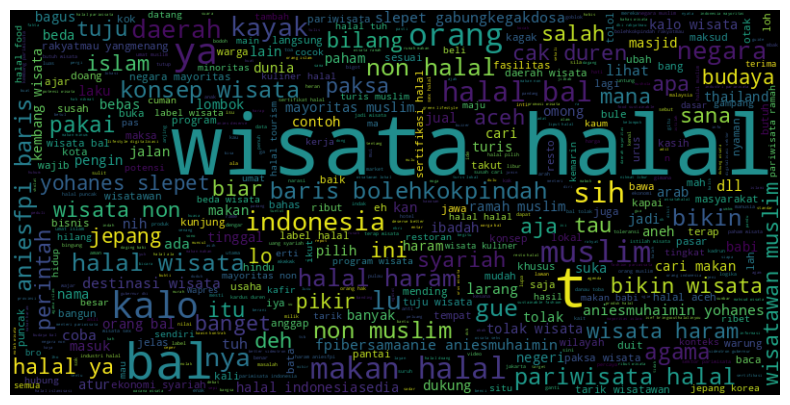

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Mengisi nilai NaN dengan string kosong ('')
df['stemming_data'].fillna('', inplace=True)

# Menggabungkan teks dari kolom 'stemming_data'
text = ' '.join(df['stemming_data'].astype(str).tolist())

# Set stopwords
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=800, height=400)

# Membuat WordCloud dari teks
wc.generate(text)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
# Menyimpan DataFrame ke dalam file CSV dengan nama 'output.csv'
df.to_csv('text_processing_halal.csv', index=False)